In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
resist="Resistència "
import os

if not os.path.exists("images"):
    os.mkdir("images")
import matplotlib.pyplot as plt
plt.style.use('classic')

In [165]:
b10041=pd.read_csv("10041.csv",sep=';',decimal=',')
b15026=pd.read_csv("15026.csv",sep=';',decimal=',')
b30026=pd.read_csv("30026.csv",sep=';',decimal=',')
b30033=pd.read_csv("30033.csv",sep=';',decimal=',')
b7526=pd.read_csv("7526.csv",sep=';',decimal=',')
files=[b10041,b15026,b30026,b30033,b7526]
for i in range(len(files)):
    files[i]["z"]=files[i]["z"]+0.01

In [181]:
def bobina(I,N,L,R,z):
    print(I,N,L,R)
    mu0=4*np.pi*10**(-7)
    B=(mu0*I*N)/(2*L)*((z+L/2)/(np.sqrt(R**2+(z+L/2)**2))-(z-L/2)/(np.sqrt(R**2+(z-L/2)**2)))
    return B

def analisi(data,name,I,N,L,R):
    z=np.linspace(data["z"].iloc[0],data["z"].iloc[-1],num=100)
    B=bobina(I,N,L,R,z)*1000
    fig1=px.scatter(x=data['z'],y=data['Camp'],template='simple_white',error_x=data["incz"],error_y=data["IncB"])
   
    fig1.update_xaxes(ticks="inside",
                    mirror='ticks',showline=True,showgrid=True
                    )
    fig1.update_yaxes(ticks="inside",
                    mirror='ticks',showline=True,showgrid=True

                    )
    fig1.add_trace(go.Scatter(x=z,y=B,mode="markers"))
    fig1.update_layout(
    xaxis_title=r'$z\text{ (m)}^{-1}$',
    yaxis_title=r'$B\text{ (mT)}$'
    )
    fig1.write_image(f"{name}.pdf",engine="kaleido")
    fig1.show()
    print(B)
    

0.98 300 0.16 0.0165


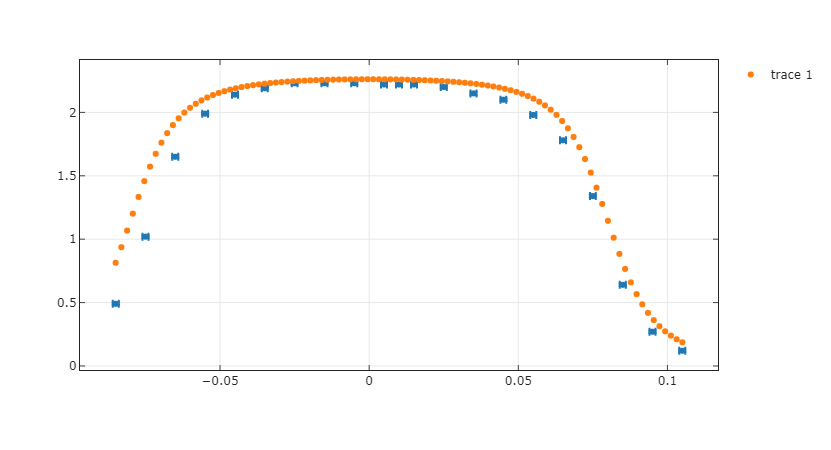

[0.1863845  0.21065479 0.23929605 0.27323204 0.31356709 0.36158983
 0.4187451  0.4865483  0.56640893 0.65933416 0.76551512 0.88387243
 1.01173917 1.14491463 1.27822597 1.4064734  1.52538658 1.63221223
 1.72579297 1.806264   1.87460054 1.93219923 1.98057502 2.021179
 2.05530878 2.08407816 2.10841964 2.12910238 2.14675548 2.16189143
 2.17492727 2.1862027  2.19599498 2.20453115 2.21199781 2.21854888
 2.22431189 2.22939288 2.2338804  2.23784865 2.24136001 2.24446709
 2.24721437 2.24963948 2.25177436 2.25364605 2.25527747 2.25668796
 2.25789377 2.25890841 2.25974304 2.26040662 2.2609062  2.26124698
 2.26143252 2.2614647  2.26134388 2.2610688  2.26063662 2.26004284
 2.25928121 2.25834359 2.25721978 2.25589729 2.25436106 2.25259311
 2.25057209 2.24827277 2.24566538 2.24271479 2.23937956 2.23561068
 2.23135011 2.22652891 2.2210649  2.21485984 2.20779581 2.19973065
 2.1904924  2.1798721  2.16761498 2.15340927 2.13687253 2.11753486
 2.09481901 2.06801773 2.03626996 1.99853974 1.95360553 1.900074

0.0022614711075724936

In [182]:
name=f'{b30033=}'.split('=')[0]
I=0.98
uI=0.01
N=300
L=0.16
uL=0.001
R=0.033/2
uR=0.001/2
analisi(b30033,name,I,N,L,R)
bobina(I,N,L,R,0)

0.98 300 0.161 0.013


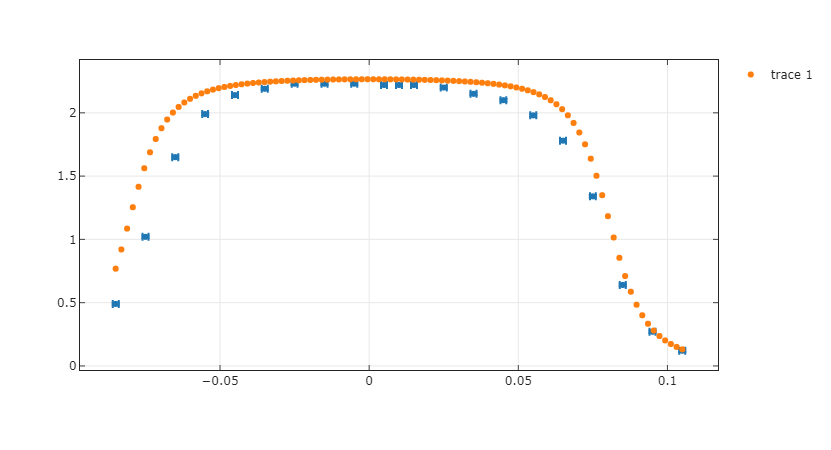

0.98 300 0.161 0.013


0.0022653789869316147

In [179]:
name=f'{b30026=}'.split('=')[0]
I=0.98
N=300
L=0.161
R=0.026/2
analisi(b30033,name,I,N,L,R)
bobina(I,N,L,R,0)

0.98 150 0.153 0.013


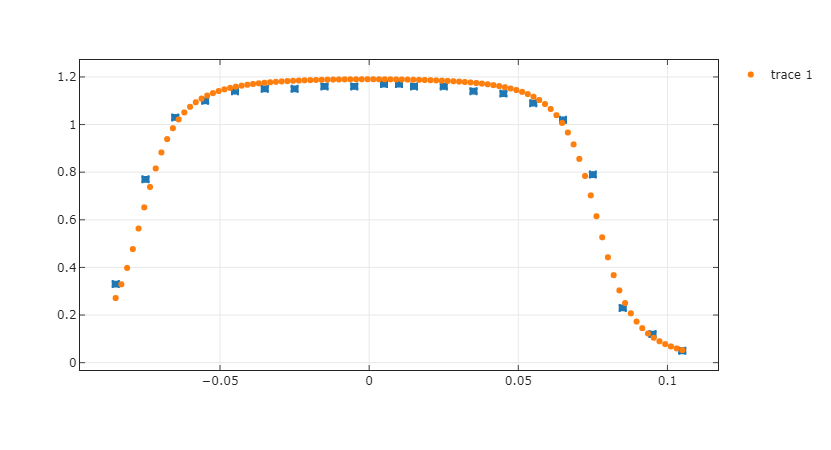

0.98 150 0.153 0.013


0.0011902929832380382

In [174]:
name=f'{b15026=}'.split('=')[0]
I=0.98
N=150
L=0.153
R=0.026/2
analisi(b15026,name,I,N,L,R)
bobina(I,N,L,R,0)

0.98 100 0.064 0.0205


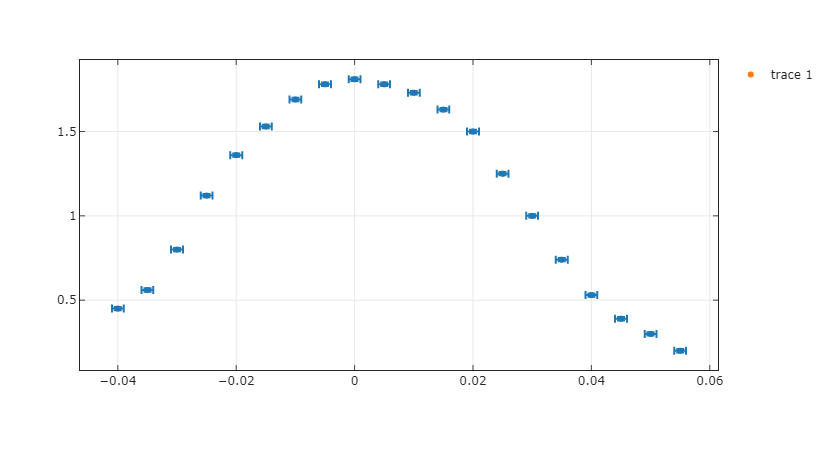

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]
0.98 100 0.064 0.0205


0.0016202601694168043

In [183]:
name=f'{b10041=}'.split('=')[0]
I=0.98
N=100
L=0.064
R=0.041/2
analisi(b10041,name,I,N,L,R)
bobina(I,N,L,R,0)

In [184]:
b10041

,z,incz,I,Int I,Camp,IncB,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,0.055,0.001,0.98,0.01,0.20,0.01,NaN,NaN,NaN
1,0.050,0.001,NaN,NaN,0.30,0.01,NaN,NaN,NaN
2,0.045,0.001,NaN,NaN,0.39,0.01,NaN,NaN,NaN
3,0.040,0.001,NaN,NaN,0.53,0.01,NaN,NaN,NaN
4,0.035,0.001,NaN,NaN,0.74,0.01,NaN,NaN,NaN
5,0.030,0.001,NaN,NaN,1.00,0.01,NaN,NaN,NaN
6,0.025,0.001,NaN,NaN,1.25,0.01,NaN,NaN,NaN
7,0.020,0.001,NaN,NaN,1.50,0.01,NaN,NaN,NaN
8,0.015,0.001,NaN,NaN,1.63,0.01,NaN,NaN,NaN
9,0.010,0.001,NaN,NaN,1.73,0.01,NaN,NaN,NaN
